## Separa os dados em treino e teste, treina o modelo, faz os testes, verifica os resultados, faz os ajustes necessários e avalia se o modelo pode ser usado para predizer o consumo de cerveja.

In [86]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None) # permite exibição de todas as linhas
pd.set_option('display.max_columns', None) # permite exibição de todas as colunas
import warnings
warnings.simplefilter('ignore') # inibe avisos de warning

In [87]:
# le os dados do dataset tratado recebendo em formato de dataframe
dfx = pd.read_csv('arquivos_tratados/df_consumo_cerveja.csv')

In [88]:
# verificando se todos os dados foram carregados
dfx.shape

(365, 7)

In [89]:
# verifica as colunas e linhas carregadas
dfx.head(3)

,Data,temp_media,temp_min,temp_max,precip_mm,fim_semana,cons_litros
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814


In [90]:
# separa as variáveis: dependente_y e independentes_x
# as variáveis independentes (x) são separadas da variável dependente (y) em dataframes diferentes
Xi = dfx[["temp_media", "temp_max", 'fim_semana']]
yi = dfx[['cons_litros']]

In [91]:
# verifica o Dtype das variáveis independentes
print(Xi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp_media  365 non-null    float64
 1   temp_max    365 non-null    float64
 2   fim_semana  365 non-null    float64
dtypes: float64(3)
memory usage: 8.7 KB
None


In [92]:
# Faz a separação dos dados de treino X_train e y_train e de teste X_test e y_test
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.30, train_size=0.70, random_state=2)

In [93]:
# Criando a arquitetura da rede neural:
k_model = Sequential() # cria o modelo

k_model.add(Dense(units=5, # inclui uma camada intermediária com 5 neurônios
                 activation='relu', 
                 input_dim=Xi_train.shape[1])) 

k_model.add(Dense(units=1, # inclui a camada de saída com 1 neurônio apenas (temos 1 variável de saída)
                 activation='linear')) 

In [94]:
# Treinando a rede neural:
k_model.compile(loss='mse', optimizer='adam', metrics=['mae'])
resultado = k_model.fit(Xi_train, yi_train, 
                       epochs=200, 
                       batch_size=32,
                       validation_data=(Xi_test, yi_test))

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 684.3206 - mae: 25.7946 - val_loss: 659.7043 - val_mae: 25.3380
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 641.4654 - mae: 24.9913 - val_loss: 641.4899 - val_mae: 24.9850
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 628.7944 - mae: 24.7395 - val_loss: 622.4241 - val_mae: 24.6083
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 620.8287 - mae: 24.5644 - val_loss: 602.5045 - val_mae: 24.2065
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 608.8160 - mae: 24.3087 - val_loss: 582.0355 - val_mae: 23.7855
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 592.4177 - mae: 23.9882 - val_loss: 561.4207 - val_mae: 23.3544
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 544.8581 - mae: 22.9488 - val_loss: 540.6882 - val_mae: 22.9126
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 532.2840 - mae: 22.7439 - val_loss: 519.5810 - val_mae: 22.4542
Epoch 9/200
8/8 ━━━━━━━━

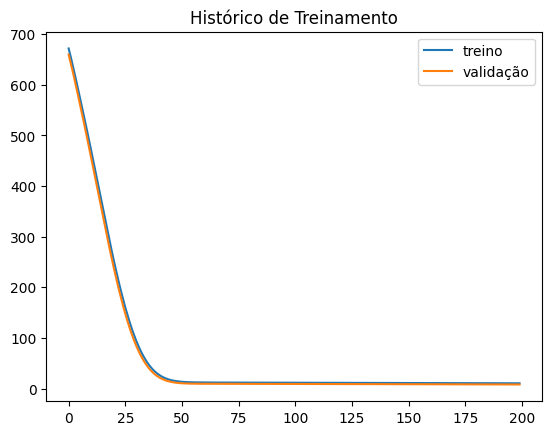

In [95]:
# Plotando gráfico do histórico de treinamento, verificando o erro de treino e de teste
plt.plot(resultado.history["loss"], label="loss")
plt.plot(resultado.history["val_loss"], label="val_loss")
plt.title('Histórico de Treinamento')
plt.legend(['treino', 'validação'])
plt.show()

In [96]:
# o df de teste tem 3 colunas (variáveis independentes)
Xi_test.shape

(110, 3)

In [97]:
# fazendo uma predição com os dados de teste
# será feito uma predição para cada linha do xi_test na mesma unidade de cons_litros
xi_teste_pred = k_model.predict(Xi_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002CD2066B240> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [98]:
# exibe o array com o resultado da predição
xi_teste_pred

array([[22.079094],
       [19.456135],
       [25.966484],
       [16.796541],
       [19.893244],
       [26.715914],
       [23.87297 ],
       [18.239923],
       [19.354391],
       [28.336512],
       [24.631357],
       [30.359465],
       [29.520567],
       [27.433481],
       [25.247019],
       [30.414122],
       [27.022577],
       [26.038403],
       [27.50358 ],
       [28.784517],
       [21.11156 ],
       [22.709215],
       [25.185167],
       [24.100525],
       [23.419298],
       [26.469822],
       [19.398602],
       [25.675858],
       [25.768372],
       [23.484863],
       [29.30126 ],
       [18.68695 ],
       [27.686926],
       [30.161901],
       [26.243542],
       [20.422453],
       [24.470097],
       [17.236208],
       [25.403038],
       [30.161736],
       [21.380686],
       [29.248255],
       [34.529156],
       [24.620657],
       [24.506601],
       [27.977552],
       [16.866257],
       [26.69146 ],
       [19.136688],
       [21.793245],


In [99]:
# salva o modelo de árvore de decisão (faz o deploy)
# o modelo treinado e aprovado, agora é salvo em um arquivo pkl para ser utilizado em futuras aplicações
joblib.dump(xi_teste_pred, "modelos/consumo_cerveja_keras_model.pkl")

['modelos/consumo_cerveja_keras_model.pkl']